In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/Mai - Iunie/Total_sales_by _supplyer_rank_5_2023.csv")

In [9]:
print(df.head())

  month_name              Supplier  total_sales  sales_rank
0       June   In House Production    246794.50           1
1       June  ONTREND H.K. LIMITED     47758.04           2
2       June            STOCKHOLMS     37149.01           3
3       June          ALEA FASHION     34236.42           4
4       June        MIGUEL BELLIDO      6292.49           5


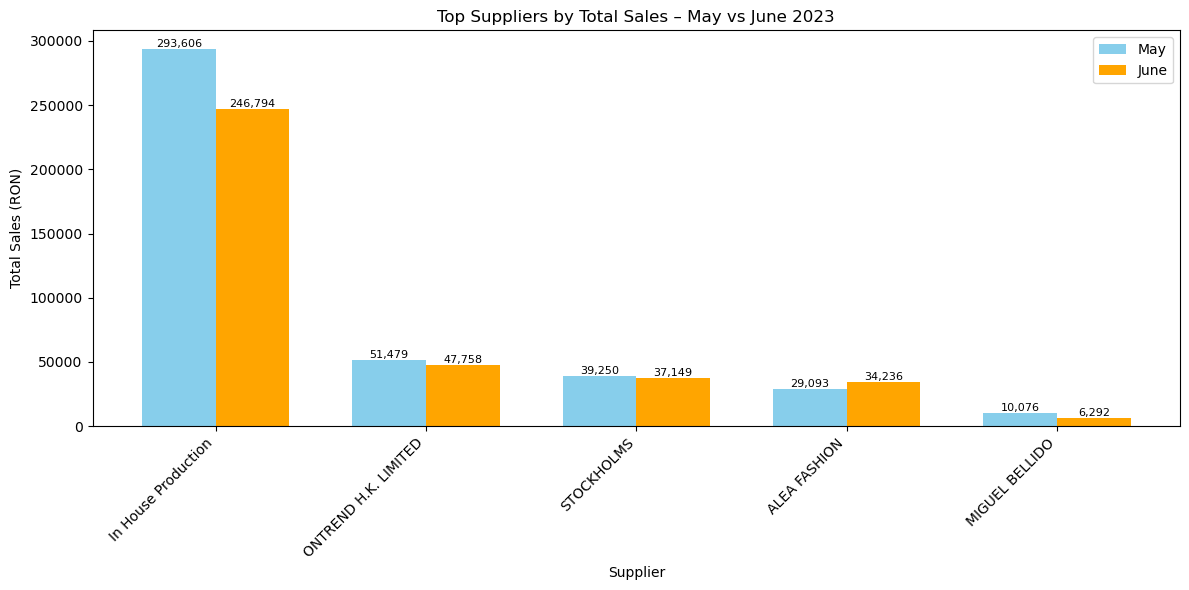

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Pivotăm datele pentru a avea lunile pe coloane
pivot_df = df.pivot(index='Supplier', columns='month_name', values='total_sales').fillna(0)

# Sortăm opțional după vânzările din iunie
pivot_df = pivot_df.sort_values(by='June', ascending=False)

# Parametrii pentru grafic
suppliers = pivot_df.index
bar_width = 0.35
x = range(len(suppliers))

plt.figure(figsize=(12, 6))

# Barele pentru May și June
bars1 = plt.bar([i - bar_width/2 for i in x], pivot_df['May'], width=bar_width, label='May', color='skyblue')
bars2 = plt.bar([i + bar_width/2 for i in x], pivot_df['June'], width=bar_width, label='June', color='orange')

# Etichete pe bare
for i, bar in enumerate(bars1):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=8)
for i, bar in enumerate(bars2):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():,.0f}", 
             ha='center', va='bottom', fontsize=8)

# Titlu și axe
plt.title("Top Suppliers by Total Sales – May vs June 2023")
plt.xlabel("Supplier")
plt.ylabel("Total Sales (RON)")
plt.xticks(x, suppliers, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/oct-nov/Monthly discount impact on net sales by product group Oct-Nov 2023.csv")

In [35]:
print(df.head())

  month_name product_group  total_discount_value  average_discount_pct  \
0   November  Men's Blazer              14062.61                 21.50   
1   November    Men's Coat               7540.72                 22.73   
2   November   Men's Shirt               6652.51                 22.36   
3   November      Trousers               5608.66                 21.39   
4   November       Sweater               2326.23                 25.39   

   total_net_sales  
0         48997.16  
1         23276.96  
2         22432.03  
3         20609.58  
4          6835.87  


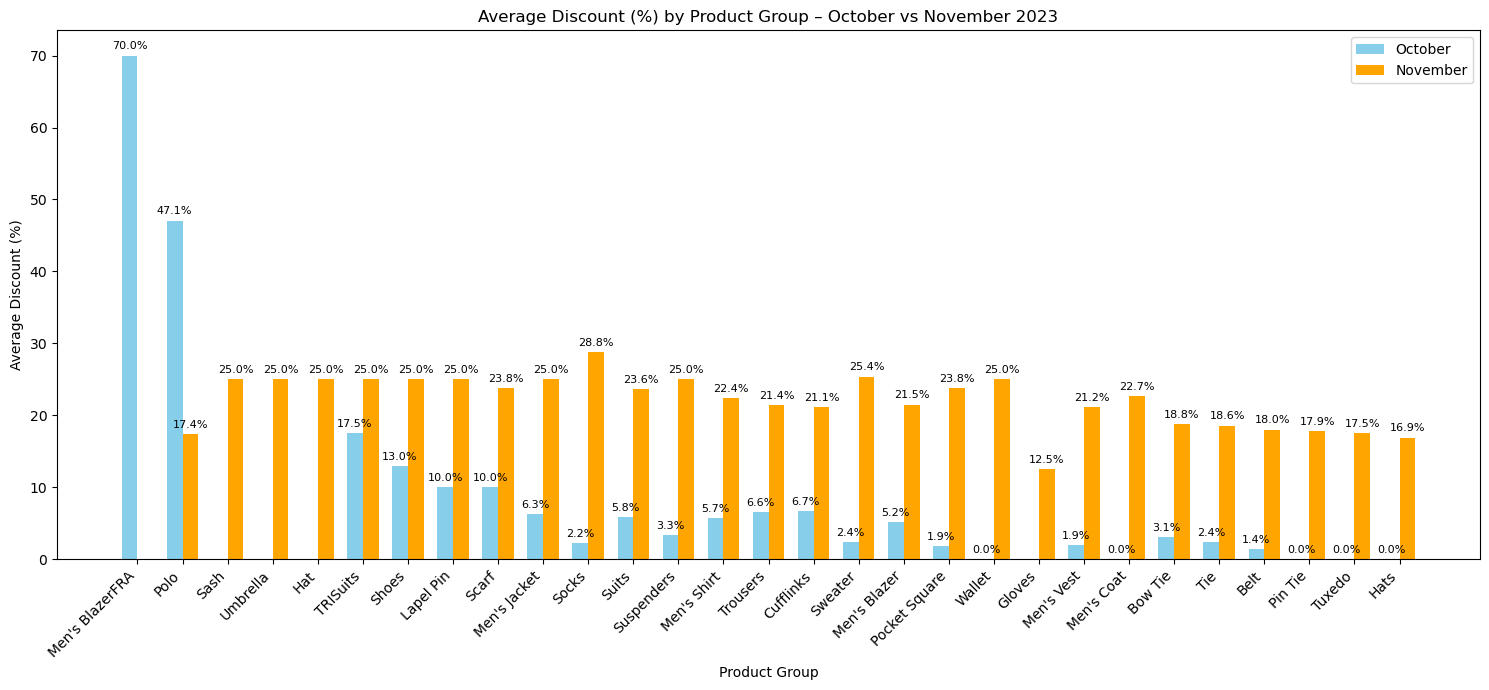

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Group data by month and product group
pivot_df = df.pivot(index='product_group', columns='month_name', values='average_discount_pct')

# Sort by average of the two months (optional for better order)
pivot_df['avg'] = pivot_df.mean(axis=1)
pivot_df = pivot_df.sort_values(by='avg', ascending=False).drop(columns='avg')

# Prepare data for plotting
labels = pivot_df.index.tolist()
x = np.arange(len(labels))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(15, 7))
bars1 = ax.bar(x - width/2, pivot_df['October'], width, label='October', color='skyblue')
bars2 = ax.bar(x + width/2, pivot_df['November'], width, label='November', color='orange')

# Add labels above each bar
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=8)

# Labels and title
ax.set_xlabel("Product Group")
ax.set_ylabel("Average Discount (%)")
ax.set_title("Average Discount (%) by Product Group – October vs November 2023")
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [63]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/oct-nov/Top product groups by sales value Oct-Nov 2023.csv")

In [65]:
print(df.head())

  month_name  Full_name  total_sales
0   November       Belt      1395.36
1   November    Bow Tie       525.66
2   November  Cufflinks      1283.41
3   November     Gloves       338.24
4   November        Hat       527.52


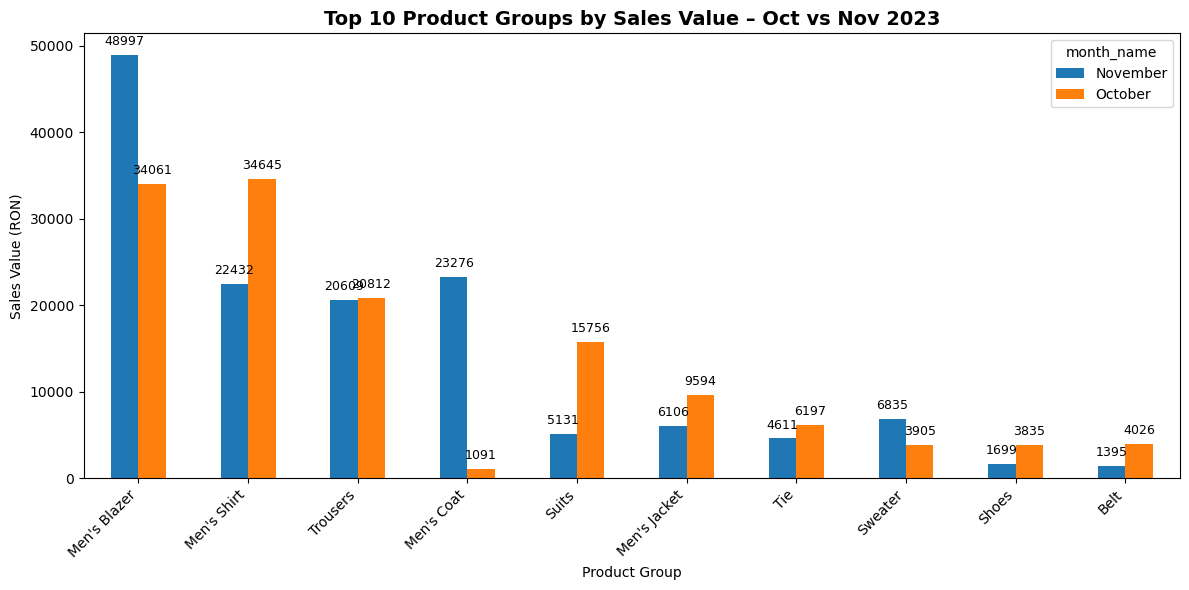

In [73]:
import matplotlib.pyplot as plt

# Pivot the DataFrame for side-by-side comparison
pivot_df = df.pivot(index='Full_name', columns='month_name', values='total_sales').fillna(0)

# Keep only Top 10 based on total (October + November)
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by='total', ascending=False).head(10)
pivot_df = pivot_df.drop(columns='total')

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=ax)

# Title and axis labels
ax.set_title('Top 10 Product Groups by Sales Value – Oct vs Nov 2023', fontsize=14, weight='bold')
ax.set_xlabel('Product Group')
ax.set_ylabel('Sales Value (RON)')
plt.xticks(rotation=45, ha='right')

# Add data labels above bars
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        ax.text(
            x, 
            height + 800, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=9
        )

# Layout and save image
plt.tight_layout()
plt.savefig("top10_sales_value_oct_nov_2023.png")
plt.show()

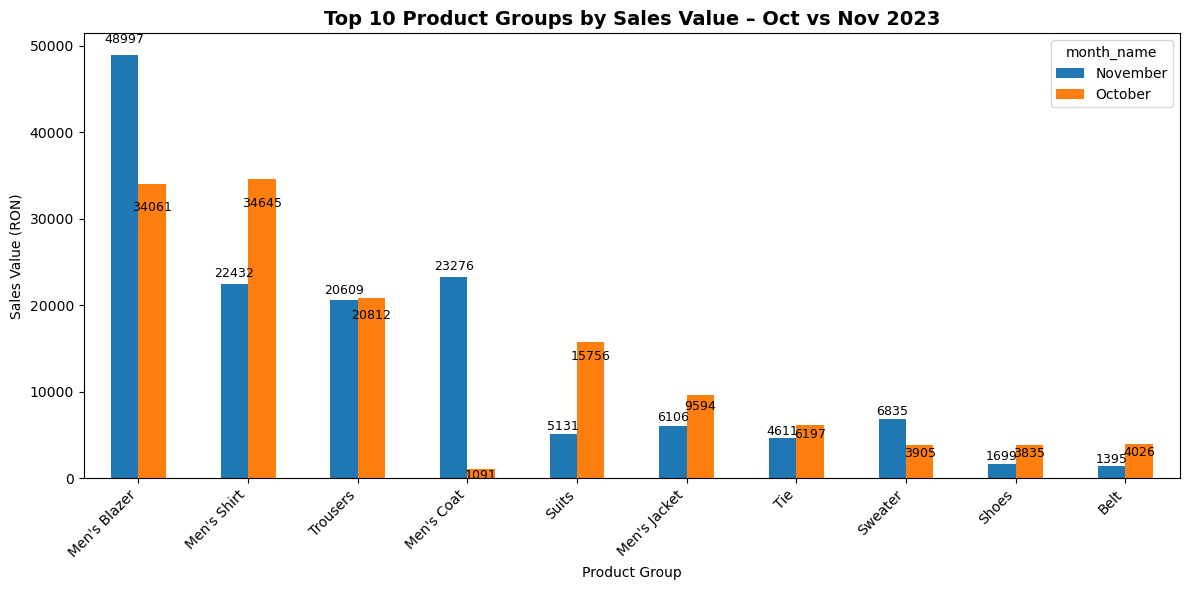

In [77]:
import matplotlib.pyplot as plt

# Pivotare
pivot_df = df.pivot(index='Full_name', columns='month_name', values='total_sales').fillna(0)

# Top 10 în funcție de total vânzări
pivot_df['total'] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values('total', ascending=False).head(10)
pivot_df.drop(columns='total', inplace=True)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
pivot_df.plot(kind='bar', ax=ax)

# Titlu și axe
ax.set_title('Top 10 Product Groups by Sales Value – Oct vs Nov 2023', fontsize=14, weight='bold')
ax.set_xlabel('Product Group')
ax.set_ylabel('Sales Value (RON)')
plt.xticks(rotation=45, ha='right')

# Etichete alternante (sus-jos)
for i, container in enumerate(ax.containers):
    for j, bar in enumerate(container):
        height = bar.get_height()
        offset = height * 0.02  # spațiu față de bară
        if height > 0:
            # Dacă e prima coloană (Octombrie), o punem sus; dacă e a doua (Noiembrie), o punem jos
            if i == 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height + offset,
                    f'{int(height)}',
                    ha='center',
                    va='bottom',
                    fontsize=9
                )
            else:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height - offset * 3,  # dedesubt
                    f'{int(height)}',
                    ha='center',
                    va='top',
                    fontsize=9
                )

# Layout final și salvare
plt.tight_layout()
plt.savefig("top10_sales_value_oct_nov_2023_fixed.png")
plt.show()

In [51]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/oct-nov/Quantity sold Oct-Nov 2023.csv")

In [53]:
print(df.head())

  month_name  Full_name  total_quantity
0   November       Belt               9
1   November    Bow Tie               6
2   November  Cufflinks              13
3   November     Gloves               2
4   November        Hat               3


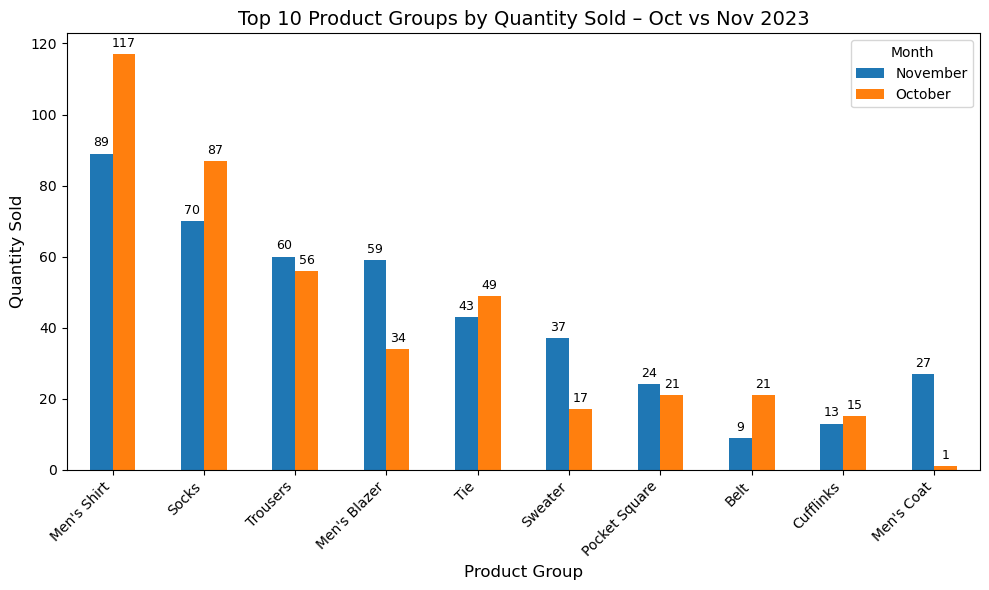

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Rename df to df_qty to keep things clear
df_qty = df.copy()

# Make sure 'total_quantity' is numeric
df_qty['total_quantity'] = df_qty['total_quantity'].astype(float)

# Get Top 10 product groups by total quantity sold (October + November)
top10_qty_names = (
    df_qty.groupby('Full_name')['total_quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter dataset to include only Top 10
df_qty_top10 = df_qty[df_qty['Full_name'].isin(top10_qty_names)].copy()

# Set correct category order for plotting
df_qty_top10['Full_name'] = pd.Categorical(df_qty_top10['Full_name'], categories=top10_qty_names, ordered=True)

# Create pivot table for bar chart
pivot_qty = df_qty_top10.pivot(index='Full_name', columns='month_name', values='total_quantity').fillna(0)

# Plot chart
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e']  # October = blue, November = orange
pivot_qty.plot(kind='bar', ax=ax, color=colors)

# Add titles and labels
plt.title('Top 10 Product Groups by Quantity Sold – Oct vs Nov 2023', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=12)
plt.xlabel('Product Group', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Month')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=9)

# Save and display chart
plt.tight_layout()
plt.savefig("top10_quantity_oct_nov_2023.png")
plt.show()

In [79]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/oct-nov/Top suppliers by total sales - split by month Oct-Nov 2023.csv")

In [81]:
print(df.head())

               Supplier  October_sales  November_sales  total_sales
0   In House Production       72429.63        99220.52    171650.15
1          ALEA FASHION       26394.00        19302.79     45696.79
2  ONTREND H.K. LIMITED       16768.68        12317.63     29086.31
3            STOCKHOLMS       12210.61        12890.75     25101.36
4             MADZERINI        9594.04         6106.45     15700.49


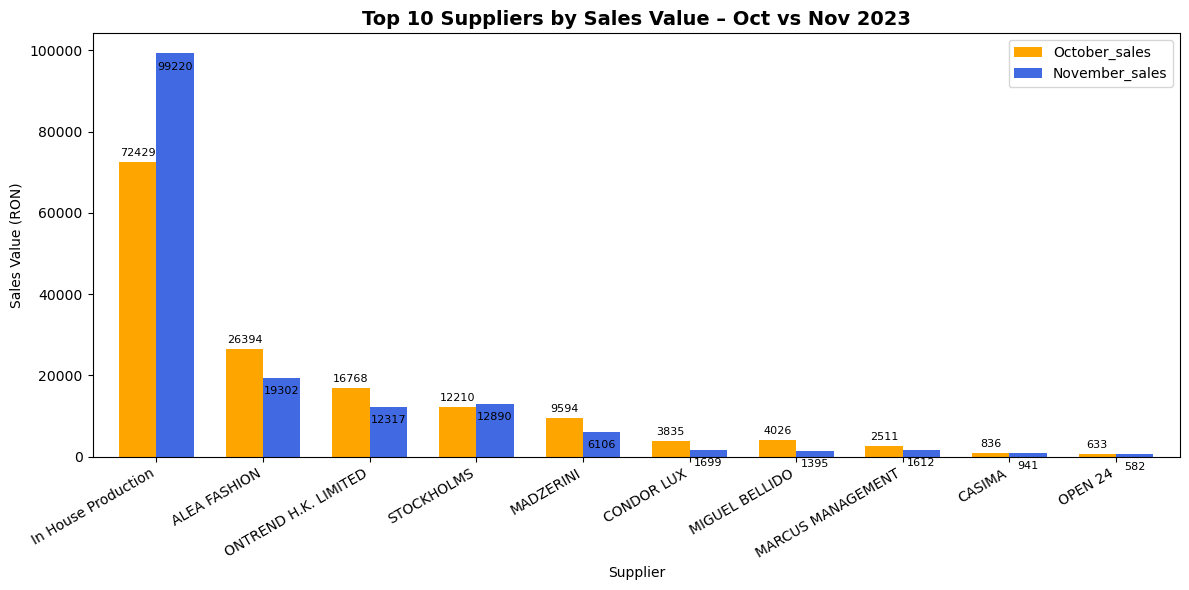

In [87]:
import matplotlib.pyplot as plt

# Sort and select top 10
df_top10 = df.sort_values(by='total_sales', ascending=False).head(10)

# Set index to Supplier and keep relevant months
plot_df = df_top10.set_index('Supplier')[['October_sales', 'November_sales']]

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = plot_df.plot(kind='bar', ax=ax, width=0.7, color=['orange', 'royalblue'])

# Titluri și axe
plt.title('Top 10 Suppliers by Sales Value – Oct vs Nov 2023', fontsize=14, weight='bold')
plt.ylabel('Sales Value (RON)')
plt.xlabel('Supplier')
plt.xticks(rotation=30, ha='right')

# Adaugă etichete peste bare, decalate vertical
for bar_group in bars.containers:
    for i, bar in enumerate(bar_group):
        height = bar.get_height()
        # Decalaj vertical: sus pentru prima bară, mai jos pentru a doua
        if bar_group == bars.containers[0]:  # October
            bars.text(bar.get_x() + bar.get_width()/2.0, height + 1000, f'{int(height)}',
                      ha='center', va='bottom', fontsize=8)
        else:  # November
            bars.text(bar.get_x() + bar.get_width()/2.0, height - 2000, f'{int(height)}',
                      ha='center', va='top', fontsize=8)

plt.tight_layout()
plt.savefig("top10_suppliers_sales_oct_nov_2023_fixed.png")
plt.show()

In [89]:
df = pd.read_csv("C:/Users/ASUS X/Desktop/fashion 2024/Year 2023/oct-nov/Top 10 products with highest sales growth % from October to November 2023.csv")

In [91]:
print(df.head())

    Full_name  october_sales  november_sales  sales_growth_value  \
0  Men's Coat        1091.60        23276.96            22185.36   
1       Scarf         376.63         3886.49             3509.86   
2     Sweater        3905.33         6835.87             2930.54   
3  Suspenders         241.25          374.34              133.09   
4      Wallet         150.42          225.62               75.20   

   sales_growth_pct  
0           2032.37  
1            931.91  
2             75.04  
3             55.17  
4             49.99  


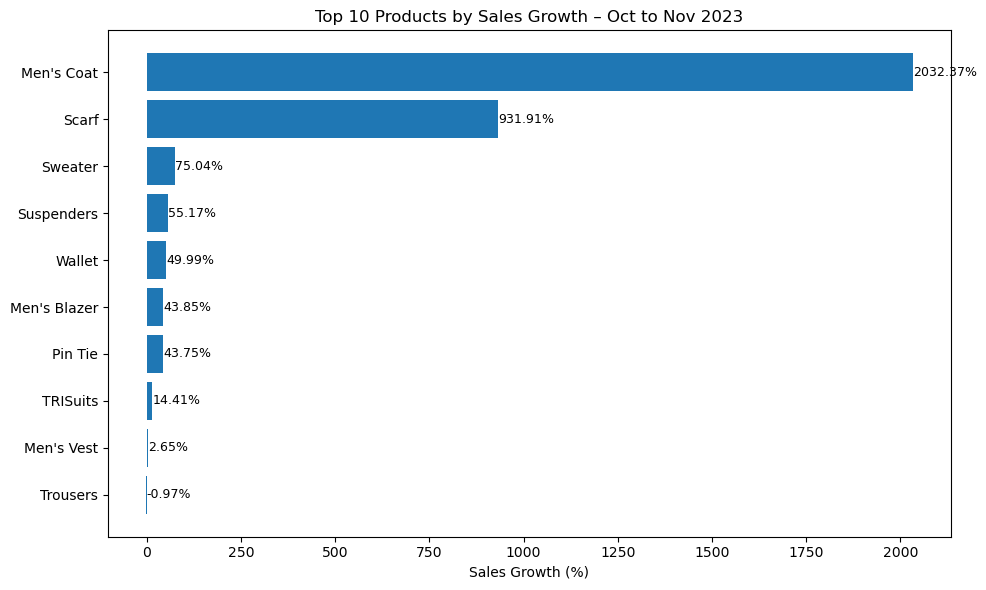

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample DataFrame from SQL export
# Columns: Full_name, october_sales, november_sales, sales_growth_value, sales_growth_pct

# Sort by sales growth % descending and keep top 10
df_sorted = df.sort_values(by='sales_growth_pct', ascending=False).head(10)

# Plot setup
plt.figure(figsize=(10, 6))
bars = plt.barh(df_sorted['Full_name'], df_sorted['sales_growth_pct'])

# Reverse order so highest is at the top
plt.gca().invert_yaxis()

# Add data labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width:.2f}%", va='center', fontsize=9)

# Axis labels and title
plt.xlabel("Sales Growth (%)")
plt.title("Top 10 Products by Sales Growth – Oct to Nov 2023")

# Improve layout
plt.tight_layout()

# Save figure as PNG
plt.savefig("top10_sales_growth_oct_nov_2023.png", dpi=300)

# Show the plot
plt.show()

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/Top%2010%20Products%20with%20Sales%20Decline%20(%25)%202023.png" width="45%">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/average%20discount%20vs%20sales%20change%20(Jan%20vs%20Mar).png" width="45%">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/top%2010%20products%20with%20highest%20sales%20growth%20(Jan%20vs%20Mar).png" width="50%">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/Top%2010%20Products%20with%20Sales%20Decline%20(%25)%202023.png" width="45%">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/average%20discount%20vs%20sales%20change%20(Jan%20vs%20Mar).png" width="45%">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/top%2010%20products%20with%20highest%20sales%20growth%20(Jan%20vs%20Mar).png" width="50%">
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/Top%2010%20Products%20with%20Sales%20Decline%20(%25)%202023.png" width="350"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/average%20discount%20vs%20sales%20change%20(Jan%20vs%20Mar%2023).png" width="350"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/top%2010%20products%20with%20highest%20sales%20growth%20(Jan%20vs%20Mar%2023).png" width="350"/>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/Top%2010%20Products%20with%20Sales%20Decline%20(%25)%202023.png" width="350"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/average%20discount%20vs%20sales%20change%20(Jan%20vs%20Mar%2023).png" width="350"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/main/images/top%2010%20products%20with%20highest%20sales%20growth%20(Jan%20vs%20Mar%2023).png" width="350"/>
</p>

<p align="center">
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/refs/heads/main/images/Top%2010%20Products%20with%20Sales%20Decline%20(%25)%202023.png" width="400"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/refs/heads/main/images/average%20discount%20vs%20sales%20change%20%25%20(Jan%20vs%20Mar%202023).png" width="400"/>
  <img src="https://raw.githubusercontent.com/rolland1986/fashion-sales-analysis/refs/heads/main/images/top%2010%20products%20with%20highest%20sales%20growth%20(Jan%20vs%20Mar%202023).png" width="400"/>
</p>